# Use the borders to know where the wave is happening (V1 or V2)

In [20]:
import h5py
import numpy as np
import scipy.stats as stat
import scipy.ndimage as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patch
from shapely.geometry import LineString, Polygon, MultiPolygon
from shapely.ops import split

In [21]:
import sys
import os
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir))
sys.path.append(parent_dir)
from Functions.Detection_functions import MCDA, circular_mask, preprocessing

In [22]:
condition='anesthesia' #between anesthesia and awake
session='spontaneous' #between evokedU, evokedD and spontaneous

In [23]:
original_data_directory=r'/media/mathis/Data/Mathis/Original Data/'

In [24]:
if condition=='awake':
    fs = 100 #Hz
    pixel_spacing = 0.0566 #mm
    if session=='evoked':
        bks_evoked_path = original_data_directory+'gaussian_pos4_ziggy_210908.npy'
        Data = np.load(bks_evoked_path)
    elif session=='spontaneous':
        bks_blank_path = original_data_directory+'blank_ziggy_210908.npy'
        Data = np.load(bks_blank_path)
    mean = np.nanmean(Data)
    nan_loc = np.isnan(Data)
    Data[nan_loc] = mean
    N_trials, Nt, Nx, Ny = Data.shape
    line=np.array([[ 48., 398.],[ 86., 131.]])
    circle =[[213, 187],193]

if condition=='anesthesia':
    fs=110 #Hz
    pixel_spacing = 0.0575 #mm
    if session=='evokedD':
        anesth_evokedD_path = original_data_directory+'signal_240306_gaussianD.mat'
        file_anesth_evokedD = h5py.File(anesth_evokedD_path)['signal']
        Data = np.rot90(np.array(file_anesth_evokedD),2, axes=(2,3))
    elif session=='evokedU':
        anesth_evokedU_path = original_data_directory+'signal_240306_gaussianU.mat'
        file_anesth_evokedU = h5py.File(anesth_evokedU_path)['signal']
        Data = np.rot90(np.array(file_anesth_evokedU),2, axes=(2,3))
    elif session=='spontaneous':
        anesth_blank_path = original_data_directory+'signal_240306_blank.mat' #change it to adapt to your directories
        file_anesth_blank = h5py.File(anesth_blank_path)['signal']
        Data = np.rot90(np.array(file_anesth_blank), 2,axes=(2,3))
    N_trials, Nt, Nx, Ny = Data.shape
    line=np.array([[252.,   2.],[ 90., 110.]])
    circle=[[137, 125],135]

In [25]:
mask = circular_mask((Nx,Ny), center=circle[0], radius=circle[1])

In [26]:
trial_number=3
test_trial=Data[trial_number]
preprocessed_trial = preprocessing(trial=test_trial, border_mask=mask, fs=fs, fc=30, threshold=99)

In [27]:
eps=16
MinPts=32
theta=.40

In [28]:
moving_clusters = MCDA(Trial=preprocessed_trial, Epsilon=eps, MinPts=MinPts, Theta=theta)

frame #0
frame #1
frame #2
frame #3
frame #4
frame #5
frame #6
frame #7
frame #8
frame #9
frame #10
frame #11
frame #12
frame #13
frame #14
frame #15
frame #16
frame #17
frame #18
frame #19
frame #20
frame #21
frame #22
frame #23
frame #24
frame #25
frame #26
frame #27
frame #28
frame #29
frame #30
frame #31
frame #32
frame #33
frame #34
frame #35
frame #36
frame #37
frame #38
frame #39
frame #40
frame #41
frame #42
frame #43
frame #44
frame #45
frame #46
frame #47
frame #48
frame #49
frame #50
frame #51
frame #52
frame #53
frame #54
frame #55
frame #56
frame #57
frame #58
frame #59
frame #60
frame #61
frame #62
frame #63
frame #64
frame #65
frame #66
frame #67
frame #68
frame #69
frame #70
frame #71
frame #72
frame #73
frame #74
frame #75
frame #76
frame #77
frame #78
frame #79
frame #80
frame #81
frame #82
frame #83
frame #84
frame #85
frame #86
frame #87
frame #88
frame #89
frame #90
frame #91
frame #92
frame #93
frame #94
frame #95
frame #96
frame #97
frame #98
frame #99
frame #100

In [29]:
for mc in moving_clusters:
    print(mc['trace'])

[110, 111, 112, 113, 114, 115]
[116, 117, 118]
[124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137]


In [32]:
mc_ind=2

In [33]:
len(moving_clusters[mc_ind]['trace'])

14

In [34]:
pts=moving_clusters[mc_ind]['points']
pts_stack = np.concatenate(pts)
T=[time for index,time in enumerate(moving_clusters[mc_ind]['trace']) for _ in range(len(pts[index]))]
X,Y = pts_stack[:, 0], pts_stack[:, 1]

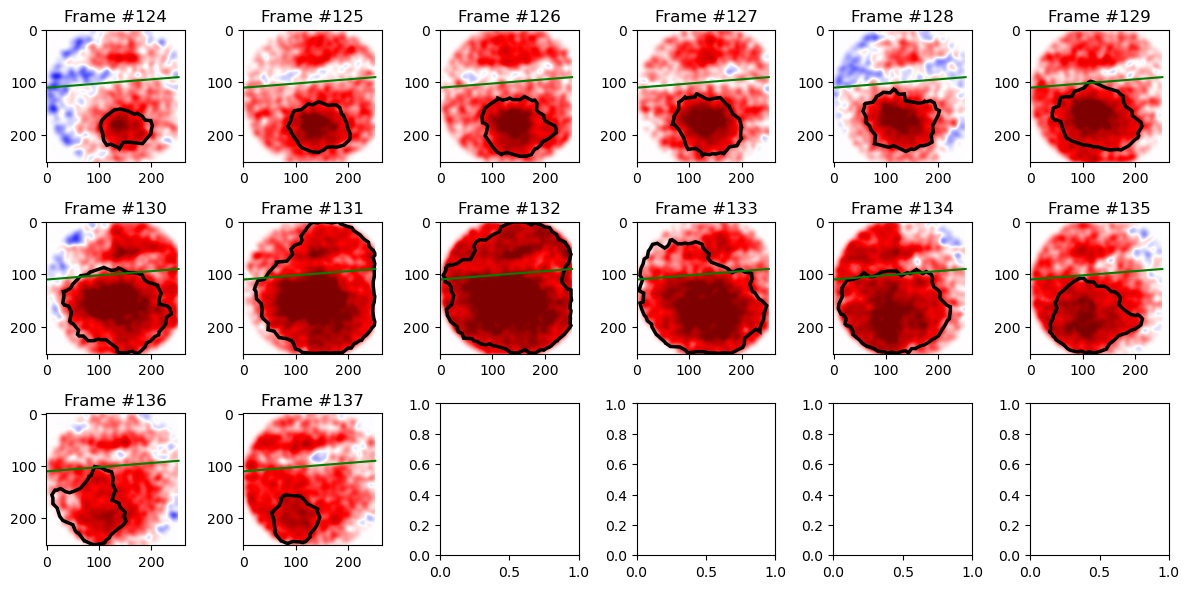

In [82]:
ncol=6
nrow=len(pts)//ncol+1

Norm = colors.Normalize(vmax=.75, vmin=-.75)
fig, axs = plt.subplots(nrow,ncol, figsize=(ncol*2,nrow*2), tight_layout=True)
for index,frame_number in enumerate(moving_clusters[mc_ind]['trace']):
    axs[index//ncol, index%ncol].set_title(f'Frame #{frame_number}')
    axs[index//ncol, index%ncol].imshow(img.gaussian_filter(test_trial[frame_number]*mask, sigma=5, mode='constant'), cmap='seismic', norm=Norm)
    x, y = moving_clusters[mc_ind]['alpha shapes'][index].exterior.xy
    mpl_poly = patch.Polygon(list(zip(y,x)), closed=True, edgecolor='k', facecolor='none', linewidth=2.5)
    axs[index//ncol, index%ncol].add_patch(mpl_poly)
    axs[index//ncol, index%ncol].plot(line[0],line[1],'g')

In [36]:
shapes=moving_clusters[mc_ind]['alpha shapes']

In [62]:
line

array([[252.,   2.],
       [ 90., 110.]])

In [46]:
line.T

array([[252.,  90.],
       [  2., 110.]])

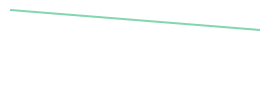

In [44]:
LineString(line.T)

In [73]:
borderline=LineString(np.flipud(line).T)#LineString(np.rot90(line,3))

In [78]:
line

array([[252.,   2.],
       [ 90., 110.]])

In [81]:
np.rot90(line,3)

array([[ 90., 252.],
       [110.,   2.]])

In [79]:
np.flipud(line).T

array([[ 90., 252.],
       [110.,   2.]])

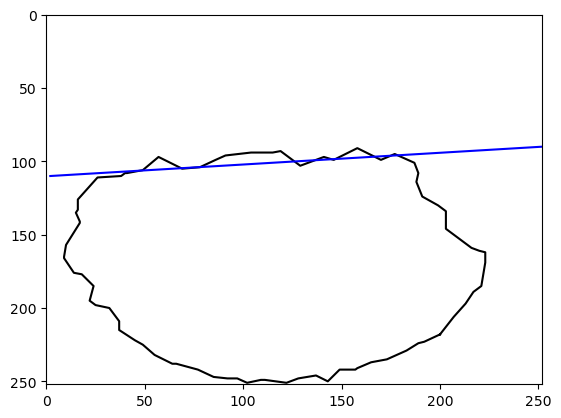

In [84]:
plt.figure()
x, y = shapes[10].exterior.xy
plt.plot(y,x, c="k")
xl,yl=borderline.coords.xy
plt.plot(yl,xl, c="b")
plt.xlim(0,Nx)
plt.ylim(0,Ny)
plt.gca().invert_yaxis()
plt.show()

In [83]:
shapes[10].crosses(borderline)

True

In [76]:
for sh in shapes:
    print(sh.crosses(borderline))

False
False
False
False
False
True
True
True
True
True
True
False
True
False


In [92]:
split(shapes[10],borderline)

AttributeError: 'Polygon' object has no attribute 'T'